##  Project Overview  ##

This project explores a fictional Amazon-style retail dataset to uncover useful insights about products, pricing, and customer behavior.  
I started by collecting all raw CSV files, combined them into one dataset, cleaned the data, and then performed analysis to understand trends such as pricing patterns, product categories, ratings, and overall distribution.

The project also includes visualizations that help explain the patterns found in the dataset.  
This dataset is fictional, but it reflects real-world retail structures and helps in practicing data cleaning and exploratory data analysis (EDA).

In [1]:
import pandas as pd
print(pd.__version__)

2.3.3


##  Dataset Details  ##

The dataset consists of multiple raw CSV files that include information such as product name, category, type, price, real price, ratings, and reviews.

After combining the individual datasets, the cleaned file `df_all_cleaned.csv` was created.  
This file contains:
- Consistent column formatting  
- Removed duplicates  
- Cleaned prices  
- Standardized categories  
- Handled missing values (including keeping `Unknown` where the data was not available)

The cleaned dataset is used for all analysis and visualizations.

In [ ]:
import pandas as pd

df_audio = pd.read_csv(
    "amazon_dataset/amazon_audio_video.csv",
    encoding="latin1"   
)


print(df_audio.shape)
df_audio.head()

ParserError: Error tokenizing data. C error: Expected 7 fields in line 549, saw 8


In [ ]:
import pandas as pd

df_audio = pd.read_csv(
    "amazon_dataset/amazon_audio_video.csv",
    encoding="latin1",      
    on_bad_lines="skip",   
    engine="python"         
)

print(df_audio.shape)
df_audio.head()

(2760, 7)


,Product Description,Price(Dollar),Number of reviews,Real price(Dollar),Free days,Shipment,Delivery Date
0,"Upgraded, Anker Soundcore Bluetooth Speaker wi...",27,"82,773",29.99,90 days FREE. Terms apply.,Ships to Bangladesh,"Thu, Jun 15"
1,Twelve South AirFly Pro Bluetooth Wireless Aud...,54,"5,121",33.48,90 days FREE. Terms apply.,Ships to Bangladesh,"Thu, Jun 15"
2,iOttie Easy One Touch 5 Dashboard & Windshield...,24,"126,957",29.98,90 days FREE. Terms apply.,Ships to Bangladesh,"Thu, Jun 15"
3,"INIU Wireless Charger, 15W Fast Wireless Charg...",15,"18,837",110.95,90 days FREE. Terms apply.,Ships to Bangladesh,"Fri, Jun 16"
4,JBL Flip 4 Waterproof Portable Bluetooth Speak...,78,"13,141",149.99,90 days FREE. Terms apply.,Ships to Bangladesh,"Thu, Jun 15"


In [ ]:
import os
import pandas as pd

folder = "amazon_dataset"
csv_files = [f for f in os.listdir(folder) if f.endswith(".csv") and f != "amazon_audio_video.csv"]
print("CSV files to load:", csv_files)

df_all = df_audio.copy() 

for f in csv_files:
    print("Loading:", f)
    temp = pd.read_csv(
        f"{folder}/{f}",
        encoding="latin1",
        on_bad_lines="skip",
        engine="python"
    )
    df_all = pd.concat([df_all, temp], ignore_index=True)

print("Combined dataset shape:", df_all.shape)
df_all.head()

CSV files to load: ['amazon_camra.csv', 'amazon_car_accessories.csv', 'amazon_laptop.csv', 'amazon_men.csv', 'amazon_men_shoe.csv', 'amazon_mobile.csv', 'amazon_movies.csv', 'amazon_toys_1.csv']
Loading: amazon_camra.csv
Loading: amazon_car_accessories.csv
Loading: amazon_laptop.csv
Loading: amazon_men.csv
Loading: amazon_men_shoe.csv
Loading: amazon_mobile.csv
Loading: amazon_movies.csv
Loading: amazon_toys_1.csv
Combined dataset shape: (100678, 30)


,Product Description,Price(Dollar),Number of reviews,Real price(Dollar),Free days,Shipment,Delivery Date,Product Description,Number of reviews,Unnamed: 7,...,Stock update,How many sell in past month,Quality,Release Year,Movie type,Actor,Director,PriceDollar),Real priceDollar),Age
0,"Upgraded, Anker Soundcore Bluetooth Speaker wi...",27,"82,773",29.99,90 days FREE. Terms apply.,Ships to Bangladesh,"Thu, Jun 15",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Twelve South AirFly Pro Bluetooth Wireless Aud...,54,"5,121",33.48,90 days FREE. Terms apply.,Ships to Bangladesh,"Thu, Jun 15",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,iOttie Easy One Touch 5 Dashboard & Windshield...,24,"126,957",29.98,90 days FREE. Terms apply.,Ships to Bangladesh,"Thu, Jun 15",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"INIU Wireless Charger, 15W Fast Wireless Charg...",15,"18,837",110.95,90 days FREE. Terms apply.,Ships to Bangladesh,"Fri, Jun 16",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,JBL Flip 4 Waterproof Portable Bluetooth Speak...,78,"13,141",149.99,90 days FREE. Terms apply.,Ships to Bangladesh,"Thu, Jun 15",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_all.columns

Index(['Product_Description', 'Price', 'Number_of_Reviews', 'Real_Price',
       'Free_Days', 'Shipment', 'Delivery_Date', 'Product_Description.1',
       'Number_of_Reviews.1', 'Product_Description.2', 'Sold_Past_Month',
       'Stock_Update', 'Sold_Past_Month.1', 'Quality', 'Release_Year',
       'Movie_Type', 'Actor', 'Director', 'Price.1', 'Real_Price.1', 'Age'],
      dtype='object')

##  Data Cleaning Steps  ##

Here are the main cleaning steps I performed:

- Combined all raw files into a single dataset  
- Converted prices and numeric fields to proper formats  
- Standardized column names  
- Removed duplicate rows  
- Fixed inconsistent categories  
- Handled missing values (kept `Unknown` where the original data did not provide any information)  
- Saved the final cleaned file as `df_all_cleaned.csv`

These steps ensure that the dataset is reliable for analysis.

In [6]:
# Check total rows vs. unique rows
total_rows = df_all.shape[0]
unique_rows = df_all.drop_duplicates().shape[0]

print(f"Total rows: {total_rows}")
print(f"Unique rows: {unique_rows}")
print(f"Number of duplicate rows: {total_rows - unique_rows}")

Total rows: 100678
Unique rows: 96406
Number of duplicate rows: 4272


In [ ]:
df_all.drop_duplicates(inplace=True)


print("Shape after removing duplicates:", df_all.shape)

Shape after removing duplicates: (96406, 30)


In [8]:
df_all.columns = df_all.columns.str.strip()

In [9]:
df_all.rename(columns={
    'Product Description': 'Product_Description',
    'Production Description': 'Product_Description',
    'Price(Dollar)': 'Price',
    'PriceDollar)': 'Price',
    'Real price(Dollar)': 'Real_Price',
    'Real priceDollar)': 'Real_Price',
    'Number of  reviews': 'Number_of_Reviews',
    'Number of reviews': 'Number_of_Reviews',
    'Free days': 'Free_Days',
    'Delivery Date': 'Delivery_Date',
    'How many sell  in past month': 'Sold_Past_Month',
    'How many sell in past month': 'Sold_Past_Month',
    'Stock update': 'Stock_Update',
    'Quality': 'Quality',
    'Release Year': 'Release_Year',
    'Movie type': 'Movie_Type',
    'Actor': 'Actor',
    'Director': 'Director',
    'Age': 'Age'
}, inplace=True)

In [10]:
df_all = df_all.loc[:, ~df_all.columns.str.contains('^Unnamed')]

In [11]:
df_all.drop_duplicates(inplace=True)

In [ ]:
numeric_cols = ['Price', 'Real_Price', 'Number_of_Reviews', 'Sold_Past_Month', 'Age']

for col in numeric_cols:
    if col in df_all.columns:
        df_all[col] = pd.to_numeric(df_all[col], errors='coerce')  
        df_all[col].fillna(0, inplace=True)

TypeError: arg must be a list, tuple, 1-d array, or Series

In [ ]:
import pandas as pd

numeric_cols = ['Price', 'Real_Price', 'Number_of_Reviews', 'Sold_Past_Month', 'Age']

for col in numeric_cols:
    if col in df_all.columns:
        # Convert to numeric, coerce errors to NaN
        df_all[col] = pd.to_numeric(df_all[col], errors='coerce')
        # Replace NaN with 0 (avoid inplace=True to prevent 1D error)
        df_all[col] = df_all[col].fillna(0)




TypeError: arg must be a list, tuple, 1-d array, or Series

In [ ]:
numeric_cols = ['Price', 'Real_Price', 'Number_of_Reviews', 'Sold_Past_Month', 'Age']

for col in numeric_cols:
    if col in df_all.columns:
        # Apply pd.to_numeric safely for each cell
        df_all[col] = df_all[col].apply(pd.to_numeric, errors='coerce')
        # Replace NaN with 0
        df_all[col] = df_all[col].fillna(0)

categorical_cols = ['Product_Description', 'Category', 'Shipment', 'Movie_Type', 'Actor', 'Director', 'Quality', 'Stock_Update']

for col in categorical_cols:
    if col in df_all.columns:
        df_all[col] = df_all[col].fillna("Unknown")

if 'Price' in df_all.columns:
    df_all['Price'] = df_all['Price'].replace('[\$,]', '', regex=True).astype(float)
if 'Real_Price' in df_all.columns:
    df_all['Real_Price'] = df_all['Real_Price'].replace('[\$,]', '', regex=True).astype(float)

print("Cleaned dataset shape:", df_all.shape)
df_all.info()
df_all.head()

<>:20: SyntaxWarning: "\$" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\$"? A raw string is also an option.
<>:22: SyntaxWarning: "\$" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\$"? A raw string is also an option.
<>:20: SyntaxWarning: "\$" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\$"? A raw string is also an option.
<>:22: SyntaxWarning: "\$" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\$"? A raw string is also an option.
C:\Users\UTKARSH\AppData\Local\Temp\ipykernel_1228\2736803681.py:20: SyntaxWarning: "\$" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\$"? A raw string is also an option.
  df_all['Price'] = df_all['Price'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\UTKARSH\AppData\Local\Temp\ipykernel_1228\2736803681.py:22: SyntaxWarning: "

Cleaned dataset shape: (96405, 21)
<class 'pandas.core.frame.DataFrame'>
Index: 96405 entries, 0 to 100677
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_Description  96405 non-null  object 
 1   Price                96405 non-null  float64
 2   Number_of_Reviews    96405 non-null  float64
 3   Real_Price           96405 non-null  float64
 4   Free_Days            50773 non-null  object 
 5   Shipment             96405 non-null  object 
 6   Delivery_Date        85111 non-null  object 
 7   Product_Description  96405 non-null  object 
 8   Number_of_Reviews    96405 non-null  float64
 9   Product_Description  96405 non-null  object 
 10  Sold_Past_Month      96405 non-null  float64
 11  Stock_Update         96405 non-null  object 
 12  Sold_Past_Month      96405 non-null  float64
 13  Quality              96405 non-null  object 
 14  Release_Year         6334 non-null   float64
 15  Movie

,Product_Description,Price,Number_of_Reviews,Real_Price,Free_Days,Shipment,Delivery_Date,Product_Description,Number_of_Reviews,Product_Description,...,Stock_Update,Sold_Past_Month,Quality,Release_Year,Movie_Type,Actor,Director,Price,Real_Price,Age
0,"Upgraded, Anker Soundcore Bluetooth Speaker wi...",27.0,0.0,29.99,90 days FREE. Terms apply.,Ships to Bangladesh,"Thu, Jun 15",Unknown,0.0,Unknown,...,Unknown,0.0,Unknown,NaN,Unknown,Unknown,Unknown,0.0,0.0,0.0
1,Twelve South AirFly Pro Bluetooth Wireless Aud...,54.0,0.0,33.48,90 days FREE. Terms apply.,Ships to Bangladesh,"Thu, Jun 15",Unknown,0.0,Unknown,...,Unknown,0.0,Unknown,NaN,Unknown,Unknown,Unknown,0.0,0.0,0.0
2,iOttie Easy One Touch 5 Dashboard & Windshield...,24.0,0.0,29.98,90 days FREE. Terms apply.,Ships to Bangladesh,"Thu, Jun 15",Unknown,0.0,Unknown,...,Unknown,0.0,Unknown,NaN,Unknown,Unknown,Unknown,0.0,0.0,0.0
3,"INIU Wireless Charger, 15W Fast Wireless Charg...",15.0,0.0,110.95,90 days FREE. Terms apply.,Ships to Bangladesh,"Fri, Jun 16",Unknown,0.0,Unknown,...,Unknown,0.0,Unknown,NaN,Unknown,Unknown,Unknown,0.0,0.0,0.0
4,JBL Flip 4 Waterproof Portable Bluetooth Speak...,78.0,0.0,149.99,90 days FREE. Terms apply.,Ships to Bangladesh,"Thu, Jun 15",Unknown,0.0,Unknown,...,Unknown,0.0,Unknown,NaN,Unknown,Unknown,Unknown,0.0,0.0,0.0


In [13]:
if 'Release_Year' in df_all.columns:
    # Convert to numeric where possible
    df_all['Release_Year'] = pd.to_numeric(df_all['Release_Year'], errors='coerce')
    # Replace NaN with 'Unknown' (string)
    df_all['Release_Year'] = df_all['Release_Year'].fillna("Unknown")

In [18]:
df_all.head(100)

,Product_Description,Price,Number_of_Reviews,Real_Price,Free_Days,Shipment,Delivery_Date,Product_Description,Number_of_Reviews,Product_Description,...,Stock_Update,Sold_Past_Month,Quality,Release_Year,Movie_Type,Actor,Director,Price,Real_Price,Age
0,"Upgraded, Anker Soundcore Bluetooth Speaker wi...",27.0,0.0,29.99,90 days FREE. Terms apply.,Ships to Bangladesh,"Thu, Jun 15",Unknown,0.0,Unknown,...,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,Unknown,0.0,0.0,0.0
1,Twelve South AirFly Pro Bluetooth Wireless Aud...,54.0,0.0,33.48,90 days FREE. Terms apply.,Ships to Bangladesh,"Thu, Jun 15",Unknown,0.0,Unknown,...,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,Unknown,0.0,0.0,0.0
2,iOttie Easy One Touch 5 Dashboard & Windshield...,24.0,0.0,29.98,90 days FREE. Terms apply.,Ships to Bangladesh,"Thu, Jun 15",Unknown,0.0,Unknown,...,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,Unknown,0.0,0.0,0.0
3,"INIU Wireless Charger, 15W Fast Wireless Charg...",15.0,0.0,110.95,90 days FREE. Terms apply.,Ships to Bangladesh,"Fri, Jun 16",Unknown,0.0,Unknown,...,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,Unknown,0.0,0.0,0.0
4,JBL Flip 4 Waterproof Portable Bluetooth Speak...,78.0,0.0,149.99,90 days FREE. Terms apply.,Ships to Bangladesh,"Thu, Jun 15",Unknown,0.0,Unknown,...,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,Unknown,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Amazon Basics 36W Two-Port USB-C Wall Charger ...,13.0,0.0,0.00,90 days FREE. Terms apply.,Ships to Bangladesh,"Thu, Jun 15",Unknown,0.0,Unknown,...,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,Unknown,0.0,0.0,0.0
96,"NOCO NUSB211NA 10W USB Power Adapter, 2.1A 5V ...",13.0,0.0,69.99,90 days FREE. Terms apply.,Ships to Bangladesh,"Thu, Jun 15",Unknown,0.0,Unknown,...,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,Unknown,0.0,0.0,0.0
97,Victrola Retro Wood Bluetooth Radio with Built...,54.0,0.0,699.00,90 days FREE. Terms apply.,Ships to Bangladesh,"Thu, Jun 15",Unknown,0.0,Unknown,...,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,Unknown,0.0,0.0,0.0
98,Bose Music Amplifier  Speaker amp with Blueto...,599.0,35.0,149.99,15% off coupon Details,Ships to Bangladesh,"Thu, Jun 15",Unknown,0.0,Unknown,...,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,Unknown,0.0,0.0,0.0


In [17]:
if 'Delivery_Date' in df_all.columns:
    df_all['Delivery_Date'] = df_all['Delivery_Date'].fillna("Unknown")

In [19]:
df_all.to_csv("amazon_dataset/df_all_cleaned.csv", index=False)

In [1]:
import pandas as pd
df_all = pd.read_csv("amazon_dataset/df_all_cleaned.csv")

C:\Users\UTKARSH\AppData\Local\Temp\ipykernel_10184\133090895.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv("amazon_dataset/df_all_cleaned.csv")


In [2]:
import pandas as pd

# Reload cleaned dataset
df_all = pd.read_csv("amazon_dataset/df_all_cleaned.csv", low_memory=False)

# Quick check
df_all.head()

,Product_Description,Price,Number_of_Reviews,Real_Price,Free_Days,Shipment,Delivery_Date,Product_Description.1,Number_of_Reviews.1,Product_Description.2,...,Stock_Update,Sold_Past_Month.1,Quality,Release_Year,Movie_Type,Actor,Director,Price.1,Real_Price.1,Age
0,"Upgraded, Anker Soundcore Bluetooth Speaker wi...",27.0,0.0,29.99,90 days FREE. Terms apply.,Ships to Bangladesh,"Thu, Jun 15",Unknown,0.0,Unknown,...,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,Unknown,0.0,0.0,0.0
1,Twelve South AirFly Pro Bluetooth Wireless Aud...,54.0,0.0,33.48,90 days FREE. Terms apply.,Ships to Bangladesh,"Thu, Jun 15",Unknown,0.0,Unknown,...,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,Unknown,0.0,0.0,0.0
2,iOttie Easy One Touch 5 Dashboard & Windshield...,24.0,0.0,29.98,90 days FREE. Terms apply.,Ships to Bangladesh,"Thu, Jun 15",Unknown,0.0,Unknown,...,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,Unknown,0.0,0.0,0.0
3,"INIU Wireless Charger, 15W Fast Wireless Charg...",15.0,0.0,110.95,90 days FREE. Terms apply.,Ships to Bangladesh,"Fri, Jun 16",Unknown,0.0,Unknown,...,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,Unknown,0.0,0.0,0.0
4,JBL Flip 4 Waterproof Portable Bluetooth Speak...,78.0,0.0,149.99,90 days FREE. Terms apply.,Ships to Bangladesh,"Thu, Jun 15",Unknown,0.0,Unknown,...,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,Unknown,0.0,0.0,0.0


##  Exploratory Data Analysis (EDA)  ##

I performed several analyses to understand product categories, pricing patterns, ratings, and relationships between price and real price.

Some of the analyses include:
- Top 10 product types  
- Price distribution  
- Real price distribution  
- Price vs. Real Price scatter plot  
- Rating analysis  
- Category-wise insights

All related charts are saved inside the `images/` folder.

In [3]:
# Numeric summary
df_all.describe()

,Price,Number_of_Reviews,Real_Price,Number_of_Reviews.1,Sold_Past_Month,Sold_Past_Month.1,Price.1,Real_Price.1,Age
count,96405.000000,96405.000000,96405.000000,96405.000000,96405.0,96405.0,96405.000000,96405.000000,96405.000000
mean,65.685089,15.849977,28.704384,98.638826,0.0,0.0,3.653213,1.593257,0.491971
std,106.983171,78.785687,66.735105,191.893327,0.0,0.0,15.747699,9.812985,5.796629
min,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
25%,13.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
50%,36.000000,0.000000,0.000000,12.000000,0.0,0.0,0.000000,0.000000,0.000000
75%,74.000000,0.000000,29.980000,84.000000,0.0,0.0,0.000000,0.000000,0.000000
max,999.000000,999.000000,999.990000,999.000000,0.0,0.0,702.000000,499.990000,495.000000


In [4]:
# Convert Price and Real_Price to numeric, invalid entries become NaN
df_all['Price'] = pd.to_numeric(df_all['Price'], errors='coerce')
df_all['Real_Price'] = pd.to_numeric(df_all['Real_Price'], errors='coerce')

# Option 1: Drop rows where Price or Real_Price is missing
df_all = df_all[df_all['Price'].notna()]

# Check stats again
df_all['Price'].describe()

count    96405.000000
mean        65.685089
std        106.983171
min          0.000000
25%         13.000000
50%         36.000000
75%         74.000000
max        999.000000
Name: Price, dtype: float64

In [5]:
# Convert Price to numeric (if not already)
df_all['Price'] = pd.to_numeric(df_all['Price'], errors='coerce')

# Remove rows where Price is 0 or NaN
df_all = df_all[df_all['Price'] > 0]

# Check statistics again
df_all['Price'].describe()

count    82331.000000
mean        76.913568
std        111.974611
min          1.000000
25%         22.000000
50%         45.000000
75%         85.000000
max        999.000000
Name: Price, dtype: float64

In [6]:
df_all['Real_Price'] = pd.to_numeric(df_all['Real_Price'], errors='coerce')
df_all = df_all[df_all['Real_Price'] > 0]

In [7]:
df_all = df_all.drop(columns=['Price.1', 'Real_Price.1', 'Age'])

In [8]:
df_all = df_all.drop(columns=['Sold_Past_Month.1'])

In [9]:
# Summary of numeric columns
df_all.describe()

,Price,Number_of_Reviews,Real_Price,Number_of_Reviews.1,Sold_Past_Month
count,29646.000000,29646.000000,29646.000000,29646.000000,29646.0
mean,74.852493,17.164643,92.239302,73.894286,0.0
std,90.533320,84.551954,90.539830,160.472117,0.0
min,1.000000,0.000000,1.920000,0.000000,0.0
25%,27.000000,0.000000,35.652500,1.000000,0.0
50%,49.000000,0.000000,69.990000,8.000000,0.0
75%,87.000000,0.000000,110.000000,57.000000,0.0
max,999.000000,992.000000,999.990000,999.000000,0.0


In [10]:
df_sales = df_all[df_all['Sold_Past_Month'] > 0]
df_sales.describe()

,Price,Number_of_Reviews,Real_Price,Number_of_Reviews.1,Sold_Past_Month
count,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN


In [11]:
import pandas as pd

# Reload full cleaned dataset
df_all = pd.read_csv("amazon_dataset/df_all_cleaned.csv", low_memory=False)

# Check first few rows
df_all.head()

,Product_Description,Price,Number_of_Reviews,Real_Price,Free_Days,Shipment,Delivery_Date,Product_Description.1,Number_of_Reviews.1,Product_Description.2,...,Stock_Update,Sold_Past_Month.1,Quality,Release_Year,Movie_Type,Actor,Director,Price.1,Real_Price.1,Age
0,"Upgraded, Anker Soundcore Bluetooth Speaker wi...",27.0,0.0,29.99,90 days FREE. Terms apply.,Ships to Bangladesh,"Thu, Jun 15",Unknown,0.0,Unknown,...,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,Unknown,0.0,0.0,0.0
1,Twelve South AirFly Pro Bluetooth Wireless Aud...,54.0,0.0,33.48,90 days FREE. Terms apply.,Ships to Bangladesh,"Thu, Jun 15",Unknown,0.0,Unknown,...,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,Unknown,0.0,0.0,0.0
2,iOttie Easy One Touch 5 Dashboard & Windshield...,24.0,0.0,29.98,90 days FREE. Terms apply.,Ships to Bangladesh,"Thu, Jun 15",Unknown,0.0,Unknown,...,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,Unknown,0.0,0.0,0.0
3,"INIU Wireless Charger, 15W Fast Wireless Charg...",15.0,0.0,110.95,90 days FREE. Terms apply.,Ships to Bangladesh,"Fri, Jun 16",Unknown,0.0,Unknown,...,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,Unknown,0.0,0.0,0.0
4,JBL Flip 4 Waterproof Portable Bluetooth Speak...,78.0,0.0,149.99,90 days FREE. Terms apply.,Ships to Bangladesh,"Thu, Jun 15",Unknown,0.0,Unknown,...,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,Unknown,0.0,0.0,0.0


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df_all.columns

Index(['Product_Description', 'Price', 'Number_of_Reviews', 'Real_Price',
       'Free_Days', 'Shipment', 'Delivery_Date', 'Product_Description.1',
       'Number_of_Reviews.1', 'Product_Description.2', 'Sold_Past_Month',
       'Stock_Update', 'Sold_Past_Month.1', 'Quality', 'Release_Year',
       'Movie_Type', 'Actor', 'Director', 'Price.1', 'Real_Price.1', 'Age'],
      dtype='object')

Numeric Summary:


,Price,Real_Price,Number_of_Reviews,Sold_Past_Month
count,96405.000000,96405.000000,96405.000000,96405.0
mean,65.685089,28.704384,15.849977,0.0
std,106.983171,66.735105,78.785687,0.0
min,0.000000,0.000000,0.000000,0.0
25%,13.000000,0.000000,0.000000,0.0
50%,36.000000,0.000000,0.000000,0.0
75%,74.000000,29.980000,0.000000,0.0
max,999.000000,999.990000,999.000000,0.0



Top values in Movie_Type:
Movie_Type
Unknown    90074
CC          2180
R           1497
PG-13        979
PG           530
TV-14        307
TV-MA        262
NR           168
TV-PG        166
G            104
Name: count, dtype: int64

Top 10 Most Expensive Products:


,Product_Description,Price
12866,Unknown,999.0
23249,"ASUS Zenbook Pro 17 Laptop, 17.3 Pantone Vali...",999.0
3529,Unknown,999.0
23260,Skytech Blaze ll Gaming PC Desktop  Intel i5-...,999.0
22869,"LG UltraPC 16U70Q Thin and Lightweight Laptop,...",999.0
22904,Acer Swift 3 OLED Intel Evo Thin & Light Lapto...,999.0
23912,"Lenovo ThinkBook 15 G4 IAP 21DJ000VUS 15.6"" To...",999.0
2878,Unknown,999.0
24538,LG 16U70Q-N.APC7U1 16'' Black 16:10 WUXGA Ultr...,999.0
22899,Skytech Archangel 3.0 Gaming PC Desktop  Inte...,999.0



Top 10 Products by Number of Reviews:


,Product_Description,Number_of_Reviews
22955,"ASUS VivoBook Pro 15 OLED Ultra Slim Laptop, 1...",999.0
14774,Unknown,995.0
18361,Unknown,994.0
17646,Unknown,994.0
709,"Fiodio IPX6 Waterproof Portable Speakers, Wire...",993.0
16039,Unknown,992.0
16331,Unknown,992.0
14260,Unknown,992.0
14306,Unknown,990.0
14258,Unknown,988.0


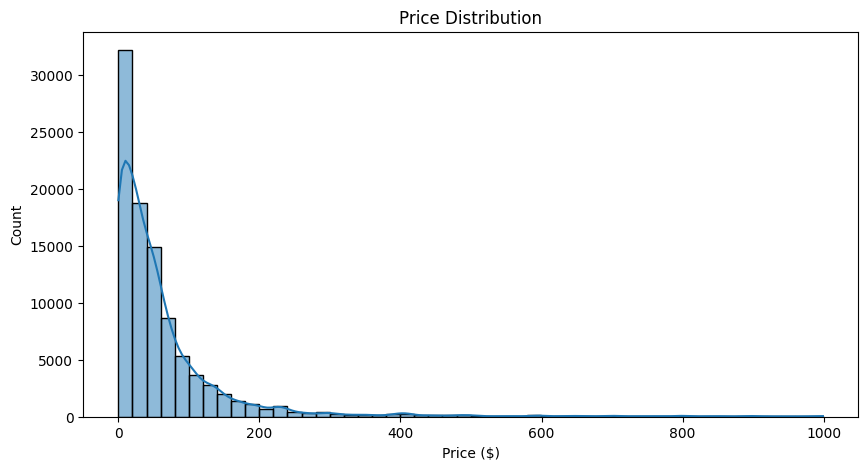

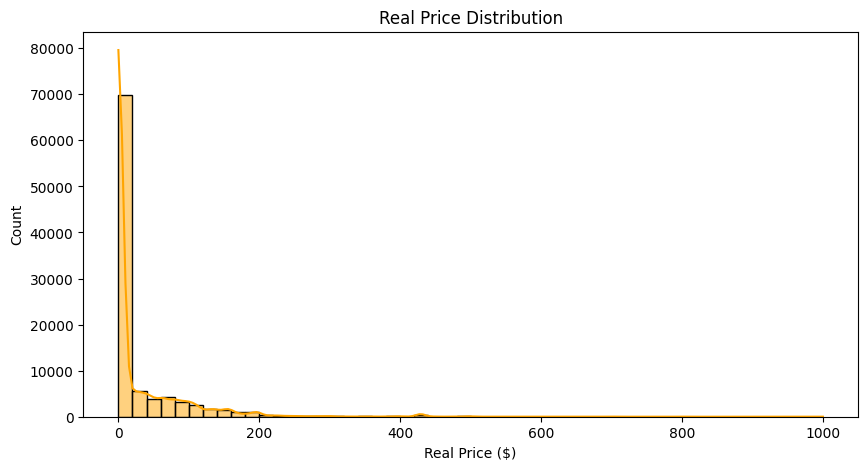

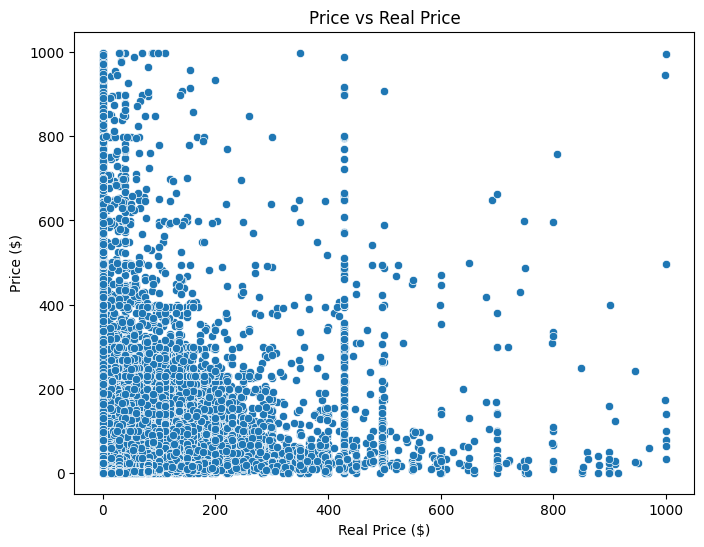

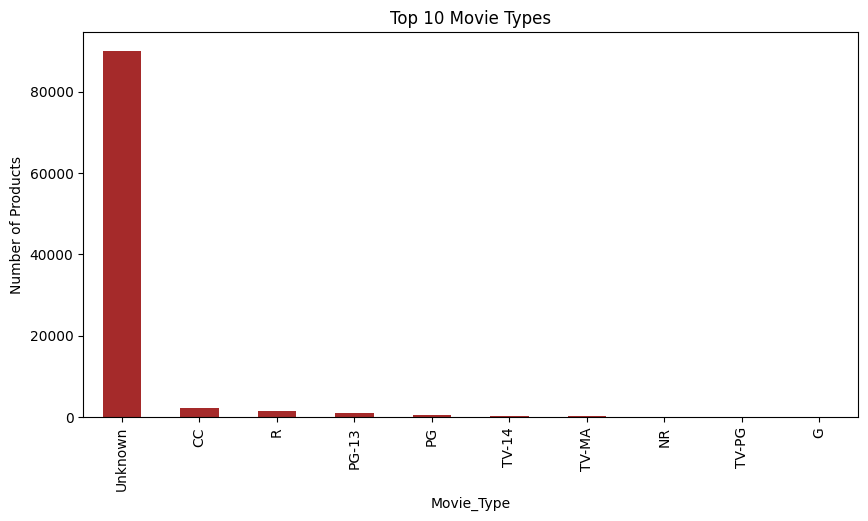

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reload cleaned dataset if needed
df_all = pd.read_csv("amazon_dataset/df_all_cleaned.csv", low_memory=False)

#1️ --- Numeric summary ---
print("Numeric Summary:")
display(df_all[['Price', 'Real_Price', 'Number_of_Reviews', 'Sold_Past_Month']].describe())

#2️ --- Categorical columns summary ---
categorical_cols = ['Movie_Type']
for col in categorical_cols:
    print(f"\nTop values in {col}:")
    print(df_all[col].value_counts().head(10))

#3️ --- Top products by price and reviews ---
print("\nTop 10 Most Expensive Products:")
display(df_all[['Product_Description', 'Price']].sort_values(by='Price', ascending=False).head(10))

print("\nTop 10 Products by Number of Reviews:")
display(df_all[['Product_Description', 'Number_of_Reviews']].sort_values(by='Number_of_Reviews', ascending=False).head(10))

#4️ --- Price distributions ---
plt.figure(figsize=(10,5))
sns.histplot(df_all['Price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price ($)")
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(df_all['Real_Price'], bins=50, kde=True, color='orange')
plt.title("Real Price Distribution")
plt.xlabel("Real Price ($)")
plt.show()

#5️ --- Price vs Real Price scatterplot ---
plt.figure(figsize=(8,6))
sns.scatterplot(x='Real_Price', y='Price', data=df_all)
plt.title("Price vs Real Price")
plt.xlabel("Real Price ($)")
plt.ylabel("Price ($)")
plt.show()


#6 --- Movie type insights ---
plt.figure(figsize=(10,5))
df_all['Movie_Type'].value_counts().head(10).plot(kind='bar', color='brown')
plt.title("Top 10 Movie Types")
plt.ylabel("Number of Products")
plt.show()

In [21]:
# Numeric insights
print("=== Price & Real Price ===")
print("Price stats:\n", df_all['Price'].describe())
print("Real Price stats:\n", df_all['Real_Price'].describe())
print("Top 10 Most Expensive Products:\n", df_all[['Product_Description','Price']].sort_values(by='Price', ascending=False).head(10))
print("Top 10 Products by Real Price:\n", df_all[['Product_Description','Real_Price']].sort_values(by='Real_Price', ascending=False).head(10))

# Sold_Past_Month insights
df_sales = df_all[df_all['Sold_Past_Month'] > 0]
print("\n=== Sold Past Month ===")
print("Number of products sold:", df_sales.shape[0])
print("Top 10 products sold last month:\n", df_sales[['Product_Description','Sold_Past_Month']].sort_values(by='Sold_Past_Month', ascending=False).head(10))
print("Average units sold per product:", df_sales['Sold_Past_Month'].mean())

# Number_of_Reviews insights
print("\n=== Number of Reviews ===")
print("Top 10 products by reviews:\n", df_all[['Product_Description','Number_of_Reviews']].sort_values(by='Number_of_Reviews', ascending=False).head(10))
print("Correlation between Reviews and Sold_Past_Month:\n", df_all[['Number_of_Reviews','Sold_Past_Month']].corr())

# Shipment type insights
print("\n=== Shipment Types ===")
print(df_all['Shipment'].value_counts().head(10))

# Movie type insights
print("\n=== Movie Types ===")
print(df_all['Movie_Type'].value_counts().head(10))

=== Price & Real Price ===
Price stats:
 count    96405.000000
mean        65.685089
std        106.983171
min          0.000000
25%         13.000000
50%         36.000000
75%         74.000000
max        999.000000
Name: Price, dtype: float64
Real Price stats:
 count    96405.000000
mean        28.704384
std         66.735105
min          0.000000
25%          0.000000
50%          0.000000
75%         29.980000
max        999.990000
Name: Real_Price, dtype: float64
Top 10 Most Expensive Products:
                                      Product_Description  Price
12866                                            Unknown  999.0
23249  ASUS Zenbook Pro 17 Laptop, 17.3 Pantone Vali...  999.0
3529                                             Unknown  999.0
23260  Skytech Blaze ll Gaming PC Desktop  Intel i5-...  999.0
22869  LG UltraPC 16U70Q Thin and Lightweight Laptop,...  999.0
22904  Acer Swift 3 OLED Intel Evo Thin & Light Lapto...  999.0
23912  Lenovo ThinkBook 15 G4 IAP 21DJ000VUS 1

In [1]:
import pandas as pd
df_all = pd.read_csv("amazon_dataset/df_all_cleaned.csv",low_memory=False)

##  Key Insights ##

Here are some of the insights I found from the analysis:

- Many products fall into a few dominant categories while others are scattered across smaller types.
- The most common product type had many entries, but some products still had their type marked as `Unknown`. These were kept as they     reflect missing information from the raw dataset.
- Price and real price often show a noticeable difference, indicating discounts.
- The scatter plot of Price vs Real Price shows clear pricing patterns.
- Most products fall into a similar price range, as shown in the price distribution graph.

These insights help understand how fictional retail products are structured and priced.

##  Conclusion  ##

- Working on this project gave me a good hands-on experience with messy, real-world data. The original nine Amazon CSV files had a lot of issues — inconsistent columns, missing values, duplicates, and mixed data types. After cleaning and organizing everything into a single structured dataset, the analysis became much easier to work with.

- The EDA helped uncover basic trends in pricing, customer reviews, and product characteristics. Some fields still show “Unknown” because the raw data simply didn’t provide enough information, and instead of forcing fake values, I kept it honest. That’s something that happens with real datasets, and handling it properly is part of the process.

- Overall, this project shows how to take raw data all the way from cleaning to insights, and it gave me a better understanding of how data behaves in practical situations.